# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import benchmark_utils as bu
import analysis_utils as au

# Run Alignments for OpenCADD.superposition for the TK Structures

Perform all pairwise alignments for the given sample structures. Every method performs 1225 alignments for the 50 tyrosine kinases. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
#bu.run_alignments(sample1_path="/Users/julian/PythonProjects/Bachelor/benchmark/TK_samples.txt", output_path="../data/OpenCADD_results/<NAME_OF_FILE>")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_TK_DFGin = pd.read_csv("../data/OpenCADD_results/20211102_superposer_benchmark_TK_DFGin.csv", names=columns)
pymol_TK_DFGin = pd.read_csv("../data/PyMol_results/20211107_pymol_benchmark_TK_DFGin.csv", names=columns)
chimerax_TK_DFGin = pd.read_csv("../data/ChimeraX_results/20211107_mmaker_benchmark_TK_DFGin.csv", names=columns)
all_TK_DFGin = pd.concat([superposer_TK_DFGin, pymol_TK_DFGin, chimerax_TK_DFGin]).reset_index(drop=True)

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [4]:
au.compute_rel_cov(all_TK_DFGin)

# Analysis

## General Checks

In [5]:
counts, nans, times = au.general_checks(all_TK_DFGin)

Check if every value is present.
It should be 1225 for every value, because there are 1225 alignments performed per method.

In [6]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
matchmaker,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mda,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mmligner,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
pymol,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
theseus,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, all alignments worked and there is no alignment missing.

In [7]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,


During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is about 4 hours. The time for downloading the structures is not included.

In [8]:
times

method
matchmaker      8.33
mda            10.39
mmligner      223.05
pymol           0.40
theseus         8.76
Name: time, dtype: float64

### Compute Mean and Median

In [9]:
mean, median = au.compute_mean_median(all_TK_DFGin)

In [10]:
mean

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,3.8271,259.8245,286.1878,283.2522,0.4082,4.0457,0.7060,1.4700,0.9510
mda,4.0789,263.1722,285.7469,282.8131,0.5088,4.2424,0.7171,1.5451,0.9644
mmligner,1.7713,239.9257,285.7469,282.8131,10.9251,2.0255,0.5897,0.7417,0.8802
pymol,3.8360,245.5551,286.1878,283.2522,0.0196,4.3094,0.7242,1.5698,0.8988
theseus,4.2732,263.2792,285.7469,282.8131,0.4291,4.4434,0.7260,1.6184,0.9648


In [11]:
median

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,3.6000,259.0,276.0,287.0,0.3794,3.8108,0.7222,1.3992,0.9526
mda,3.7226,263.0,276.0,285.0,0.4937,3.8796,0.7238,1.4253,0.9668
mmligner,1.6670,240.0,276.0,285.0,10.4304,1.9586,0.5961,0.7201,0.8893
pymol,3.5945,245.0,276.0,287.0,0.0191,4.0305,0.7372,1.4718,0.8974
theseus,3.9798,263.0,276.0,285.0,0.3953,4.0943,0.7344,1.5100,0.9669


## Create basic plots

It is easy to see in both plots, that MMLigner performs the best. Besides that, Theseus performs very similar to ChimeraX MatchMaker and PyMol align.

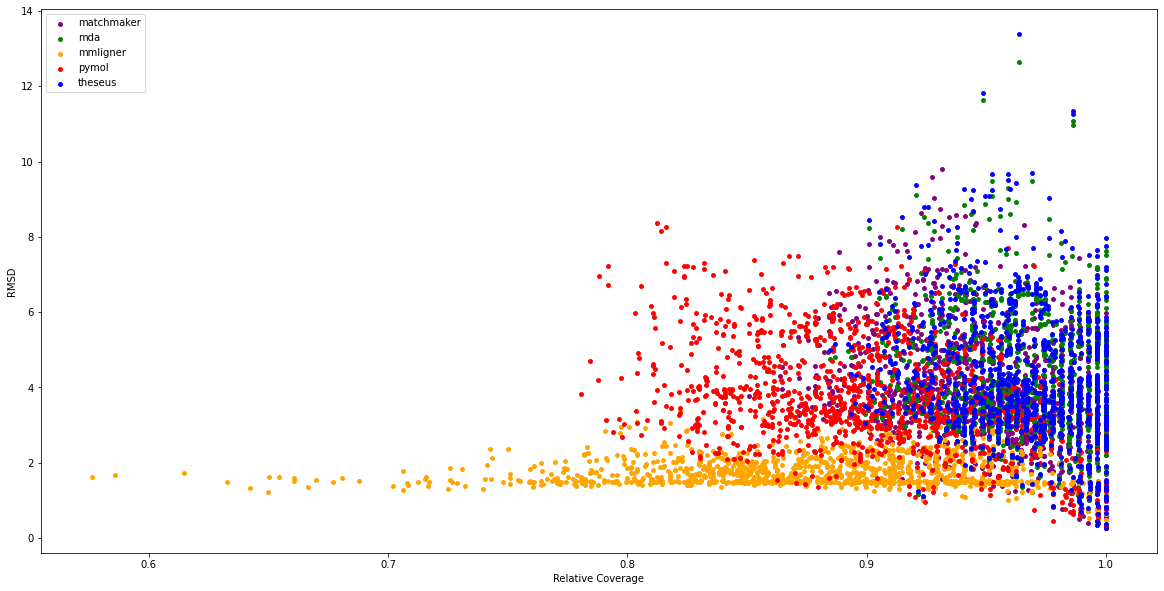

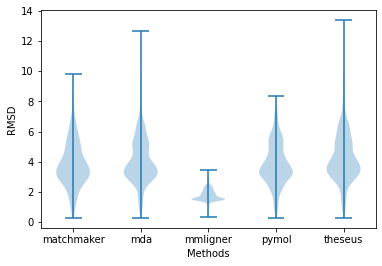

In [12]:
au.create_scatter_plot(all_TK_DFGin, path="../reports/figures/TK")
au.create_violine_plot(all_TK_DFGin, path="../reports/figures/TK")

## Check if data is normally distributed

The Kolmogorov-Smirnow-Test shows, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. But Theseus has a very similar distribution for the measures except the relative coverage. MMLigner performs the best for all measures except the relative coverage. MDA performs the worst for all measures.

Results of kstest
KstestResult(statistic=0.8731086087230179, pvalue=0.0)
KstestResult(statistic=0.8828099604815026, pvalue=0.0)
KstestResult(statistic=0.6482547664546598, pvalue=0.0)
KstestResult(statistic=0.6596769522689004, pvalue=0.0)


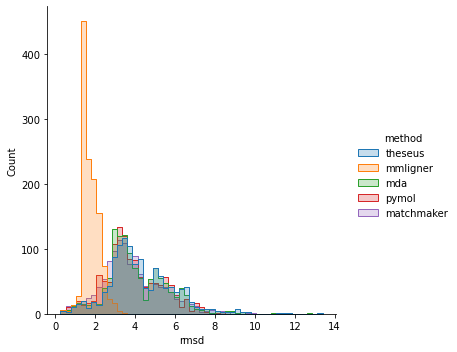

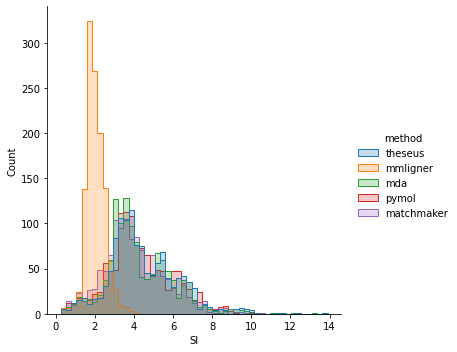

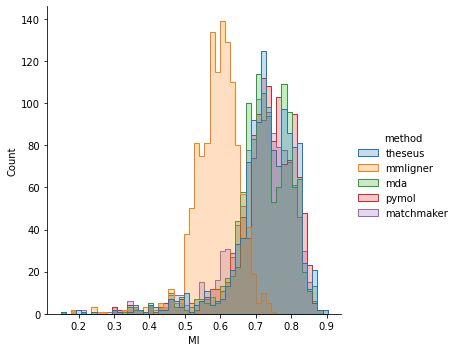

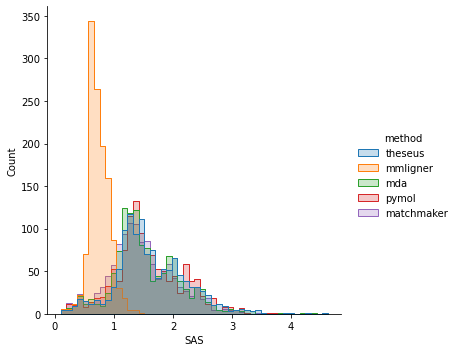

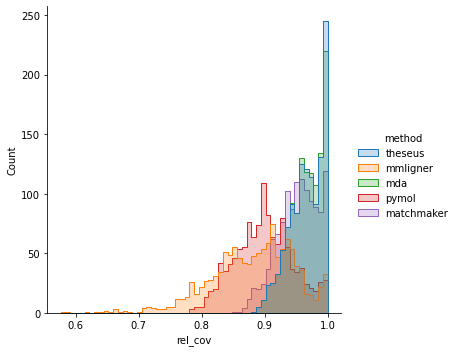

In [14]:
dist_tests = au.check_distribution(all_TK_DFGin, path="../reports/figures/TK")

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also negatively correlate with the relative coverage, which means, the lower the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

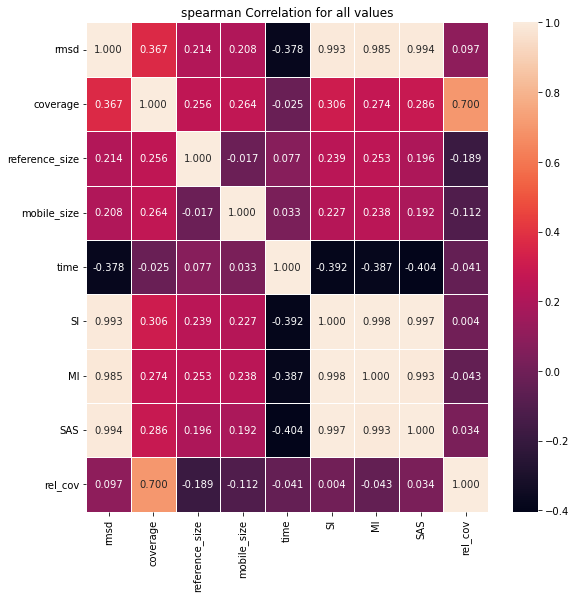

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,0.367483,0.214359,0.207826,-0.378012,0.993487,0.985007,0.994045,0.096651
coverage,0.367483,1.000000,0.255554,0.263574,-0.024651,0.306045,0.273798,0.286215,0.699789
reference_size,0.214359,0.255554,1.000000,-0.017146,0.076974,0.238667,0.252608,0.196335,-0.188599
mobile_size,0.207826,0.263574,-0.017146,1.000000,0.033014,0.226804,0.238398,0.191728,-0.111828
time,-0.378012,-0.024651,0.076974,0.033014,1.000000,-0.392224,-0.386708,-0.403636,-0.040964
SI,0.993487,0.306045,0.238667,0.226804,-0.392224,1.000000,0.997903,0.996620,0.004331
MI,0.985007,0.273798,0.252608,0.238398,-0.386708,0.997903,1.000000,0.992520,-0.042968
SAS,0.994045,0.286215,0.196335,0.191728,-0.403636,0.996620,0.992520,1.000000,0.033619
rel_cov,0.096651,0.699789,-0.188599,-0.111828,-0.040964,0.004331,-0.042968,0.033619,1.000000


In [15]:
corr = au.compute_correlation(all_TK_DFGin, coeff="spearman", path="../reports/figures/TK")
corr

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [17]:
kruskal = au.compute_kruskal(all_TK_DFGin)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=2250.610387384896, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=2083.555782627863, pvalue=0.0)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=1934.3247158531346, pvalue=0.0)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=2138.0658279510594, pvalue=0.0)


## Which groups are different

As also visible in the diagrams above, PyMol align and ChimeraX MatchMaker scores very similarely in all considered measures. Theseus is also the most similar of the remaining methods to PyMol align and ChimeraX MatchMaker but is still significantly different.

In [18]:
significant, non_significant = au.compute_mannwhitneyu(all_TK_DFGin)

All significant results:
Result for rmsd with theseus and pymol:
MannwhitneyuResult(statistic=864798.5, pvalue=6.179434497815279e-11)
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=872585.5, pvalue=2.866472584101876e-12)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=1419509.0, pvalue=0.0)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=810693.0, pvalue=0.0005629515089530412)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=1392228.5, pvalue=2.563316771522141e-294)
Result for rmsd with pymol and mda:
MannwhitneyuResult(statistic=694895.0, pvalue=0.001548803867279056)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=1376037.0, pvalue=9.144448265384726e-280)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=684211.0, pvalue=0.00015959544180281694)
Result for rmsd with mmligner and mda:
MannwhitneyuResult(statistic=89091.0, pvalue=0.0)
Result for SI with theseus an

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In [19]:
best_results = au.count_best_results(all_TK_DFGin)

Counts of best values for the Similarity Index (SI):
mmligner      1172
matchmaker      37
mda             10
pymol           10
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      1169
matchmaker      37
mda             11
pymol            8
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      1170
matchmaker      36
mda             10
pymol           10
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
matchmaker    623
mda           343
pymol         259
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
matchmaker    630
mda           391
pymol         204
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
matchmaker    633
mda           333
pymol         259
Name: method, dtype: int64
